# 실습 4

In [179]:
#pandas, numpy 호출
import pandas as pd 
import numpy as np
#sklearn 호출
from sklearn import model_selection
from sklearn import metrics
from sklearn import datasets

In [180]:
df = pd.read_csv("wine.csv") #csv 데이터 입력, 칼럼인덱스 미사용
df.head(8) #불러온 데이터프레임 상위 8개값 호출

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7


In [181]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##### 결측치 없음

# Quality 속성 매핑(3그룹으로)

In [182]:
divide = {3:'C', 4:'C',5:'B',6:'B',7:'A',8:'A'}
df['quality'] = df.quality.map(divide)
df.head(7)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,B
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,B
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,B
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,B
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,B
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,B
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,B


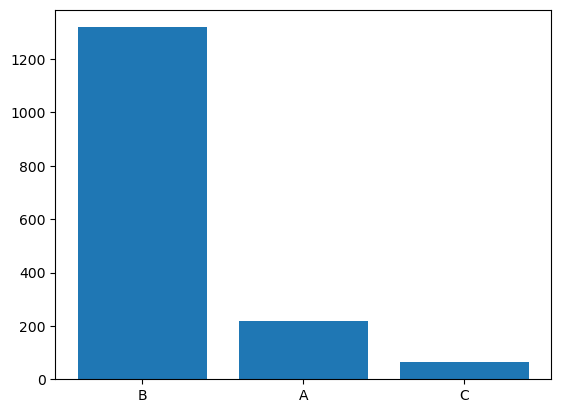

In [183]:
import matplotlib.pyplot as plot
#바그래프 출력(x값, height 값)
plot.bar(df['quality'].unique(), df['quality'].value_counts().tolist())
#plot.hist(data,bins=4) // 미사용, 2차원 데이터를 통째로 plot 에 히스토그램으로 넣을때
plot.show()

# 목표변수와 속성값 분류

In [184]:
X = np.array(df.iloc[:,:11]) #처음~마지막-1개 칼럼 포함한 모든 행 집어넣기, 속성값 X로 저장
Y = np.array(df['quality']) #quality 값을 목표변수 Y로 저장

# Split 라이브러리 호출
from sklearn.model_selection import train_test_split
#훈련시킬 데이터 세트와 테스트용 데이터 셋트로 데이터 구분(여기서는 약 10 대 3 로 분리)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=12345)
#random_state : 랜덤으로 뽑는 방식 지정, 시드를 12345로 줌

In [185]:
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [186]:
Y

array(['B', 'B', 'B', ..., 'B', 'B', 'B'], dtype=object)

# SMOTE 적용

DecisionTreeClassifier(max_depth=5, random_state=12345)

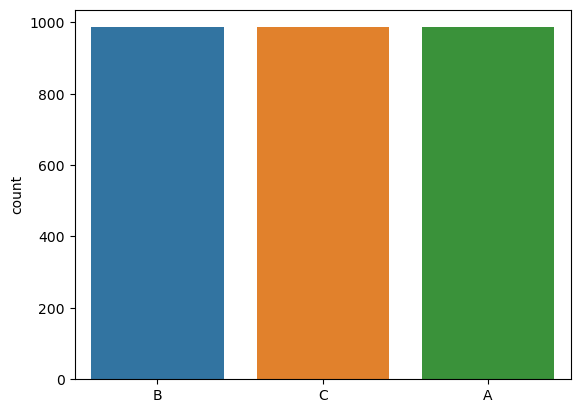

In [187]:
from imblearn.over_sampling import SMOTE
#SMOTE 객체 생성
sm = SMOTE(random_state=12345)
#X,Y값을 리샘플링
X_train_balanced, Y_train_balanced = sm.fit_resample(X_train,Y_train)

#countplot 표시
import seaborn as sns
sns.countplot(x=Y_train_balanced)

#의사결정나무 모델 라이브러리 호출
from sklearn.tree import DecisionTreeClassifier

#SMOTE 미적용 트리와 SMOTE 적용 트리 구분
tree = DecisionTreeClassifier(max_depth=5, random_state=12345)
tree.fit(X_train, Y_train)
tree_b = DecisionTreeClassifier(max_depth=5, random_state=12345)
tree_b.fit(X_train_balanced, Y_train_balanced)

##### SMOTE 를 통한 오샘플링이 되어 A와 C클래스 데이터가 추가로 생성됨을 확인할 수 있음

# 정확도 계산

In [188]:
#정확도 계산 모듈 호출
from sklearn.metrics import accuracy_score, confusion_matrix


from sklearn.metrics import classification_report

print('[NON-SMOTE]')
print('정확도: %0.2f%%' % (accuracy_score(Y_test, tree.predict(X_test))*100))
print('[오차행렬]\n')
print(confusion_matrix(Y_test, tree.predict(X_test)))
print(classification_report(Y_test, tree.predict(X_test)))


print()


print('[SMOTE]')
print('정확도: %0.2f%%' % (accuracy_score(Y_test, tree_b.predict(X_test))*100))
print('[오차행렬]\n')
print(confusion_matrix(Y_test, tree_b.predict(X_test)))
print(classification_report(Y_test, tree_b.predict(X_test)))

[NON-SMOTE]
정확도: 85.25%
[오차행렬]

[[ 30  19   1]
 [ 24 308   1]
 [  0  14   3]]
              precision    recall  f1-score   support

           A       0.56      0.60      0.58        50
           B       0.90      0.92      0.91       333
           C       0.60      0.18      0.27        17

    accuracy                           0.85       400
   macro avg       0.69      0.57      0.59       400
weighted avg       0.85      0.85      0.84       400


[SMOTE]
정확도: 56.25%
[오차행렬]

[[ 38   9   3]
 [ 74 175  84]
 [  1   4  12]]
              precision    recall  f1-score   support

           A       0.34      0.76      0.47        50
           B       0.93      0.53      0.67       333
           C       0.12      0.71      0.21        17

    accuracy                           0.56       400
   macro avg       0.46      0.66      0.45       400
weighted avg       0.82      0.56      0.63       400



## AUC값으로 모델 성능 평가

In [189]:
# AUC 및 ROC는 클래스가 2개까지만 사용가능 

In [190]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_test, tree.predict_proba(X_test)[:,1])


ValueError: multiclass format is not supported